A partir del archivo food_100, se pide:

1. Limpiar el archivo borrando las columnas Unnamed.
2. ¿Qué porcentaje de valores NaN hay en cada columna?
## La mayoría tiene un 100% de valores nan, y en general ratios demasiado altos.
3. ¿Tendría algún sentido clasificar el nombre de los alimentos a partir del top5 de columnas numéricas con menos valores NaN?
## No, ningún sentido.   
    code                 nanratio
    countries_tags       0.0
    countries_en         0.0
    states_tags          0.0
    states               0.0

In [1]:
import pandas as pd
import sys
sys.path.append('C:\\DATA_SCIENCE')
from LIBRARY.Libreria_Pandas_DVG import *
df = pd.read_csv("../data/food_100.csv")

df

,Unnamed: 0,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,...,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-estimate_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,0,3087,http://world-en.openfoodfacts.org/product/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,4530,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,14.0,14.0,NaN,NaN
2,2,4559,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Peanuts,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
3,3,16087,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489055731,2017-03-09T10:35:31Z,1489055731,2017-03-09T10:35:31Z,Organic Salted Nut Mix,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,12.0,NaN,NaN
4,4,16094,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489055653,2017-03-09T10:34:13Z,1489055653,2017-03-09T10:34:13Z,Organic Polenta,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,34715,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489055715,2017-03-09T10:35:15Z,1489055715,2017-03-09T10:35:15Z,Organic Pecan Halves,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96,96,34784,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489138485,2017-03-10T09:34:45Z,1489138485,2017-03-10T09:34:45Z,Unsalted Dry Roasted Almonds,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97,97,34791,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489055720,2017-03-09T10:35:20Z,1489055720,2017-03-09T10:35:20Z,Organic Raw Pumpkin Seeds,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,12.0,NaN,NaN
98,98,35071,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489138484,2017-03-10T09:34:44Z,1489138484,2017-03-10T09:34:44Z,Organic Extra Virgin Olive Oil,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
df.columns, len(df.columns)

(Index(['Unnamed: 0', 'code', 'url', 'creator', 'created_t', 'created_datetime',
        'last_modified_t', 'last_modified_datetime', 'product_name',
        'generic_name',
        ...
        'fruits-vegetables-nuts_100g', 'fruits-vegetables-nuts-estimate_100g',
        'collagen-meat-protein-ratio_100g', 'cocoa_100g', 'chlorophyl_100g',
        'carbon-footprint_100g', 'nutrition-score-fr_100g',
        'nutrition-score-uk_100g', 'glycemic-index_100g',
        'water-hardness_100g'],
       dtype='object', length=164),
 164)

In [3]:
df.drop(columns="Unnamed: 0", inplace=True)

In [4]:
column = []
nanratio = []
for x in df.columns:
    nan_percentage = df[x].isnull().sum()/len(df)
    column.append(x)
    nanratio.append(nan_percentage)
q = pd.DataFrame(nanratio, column, columns= ['nanratio'])
print(q.sort_values('nanratio').head(5))

                nanratio
code                 0.0
countries_tags       0.0
countries_en         0.0
states_tags          0.0
states               0.0


{'whiskers': [<matplotlib.lines.Line2D at 0x15c4e4cec40>,
 'caps': [<matplotlib.lines.Line2D at 0x15c4e4ce310>,
 'boxes': [<matplotlib.lines.Line2D at 0x15c4ee4d6a0>],
 'medians': [<matplotlib.lines.Line2D at 0x15c4e69c640>],
 'fliers': [<matplotlib.lines.Line2D at 0x15c4e69c2b0>],
 'means': []}

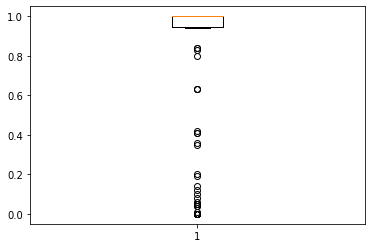

In [10]:
plt.boxplot(q)